# Практическое задание: Линейная регрессия и EDA

## Цель задания
В этом практическом задании вам предстоит выполнить полный анализ данных страховой компании, включая:
1. Разведочный анализ данных (EDA)
2. Визуализацию данных
3. Построение и оценку модели линейной регрессии

## Описание данных
Набор данных содержит информацию о страховых взносах и различных характеристиках клиентов:
- age: возраст
- sex: пол
- bmi: индекс массы тела
- children: количество детей
- smoker: статус курильщика
- region: регион проживания
- charges: страховые выплаты (целевая переменная)

## Задачи
1. Загрузка и первичный анализ данных
2. Очистка и предобработка данных
3. Разведочный анализ данных (EDA)
4. Статистический анализ
5. Подготовка признаков
6. Построение модели линейной регрессии
7. Оценка модели
8. Визуализация результатов

## Задание 1: Загрузка и первичный анализ данных

1. Загрузите библиотеки:
   - pandas для работы с данными
   - numpy для математических операций
   - matplotlib и seaborn для визуализации
   - scipy.stats для статистических тестов

2. Загрузите датасет 'insurance.csv'

3. Выполните первичный анализ данных:
   - Проверьте размерность данных
   - Выведите первые 5 строк
   - Проверьте типы данных
   - Проверьте наличие пропущенных значений
   - Выведите основные статистические характеристики

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df = pd.read_csv('insurance.csv')

print("Размерность данных:", df.shape)
print("\nПервые 5 строк:")
print(df.head())
print("\nТипы данных:")
print(df.dtypes)
print("\nПропущенные значения:")
print(df.isnull().sum())
print("\nОсновные статистические характеристики:")
print(df.describe())

Размерность данных: (1338, 7)

Первые 5 строк:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Типы данных:
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Пропущенные значения:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Основные статистические характеристики:
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  121

## Задание 2: Очистка и предобработка данных

1. Проверьте данные на наличие выбросов:
   - Используйте boxplot для числовых переменных
   - Определите наличие выбросов с помощью IQR
   - Примите решение о методе обработки выбросов

2. Проверьте распределение категориальных переменных:
   - Подсчитайте количество уникальных значений
   - Постройте графики распределения

3. Проведите необходимую предобработку:
   - Обработайте выбросы (если необходимо)
   - Преобразуйте категориальные переменные
   - Сохраните предобработанные данные

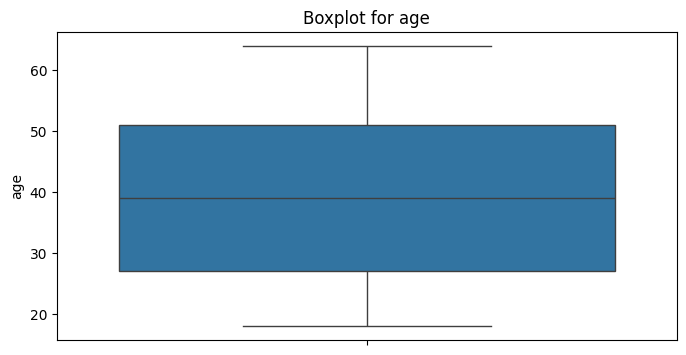

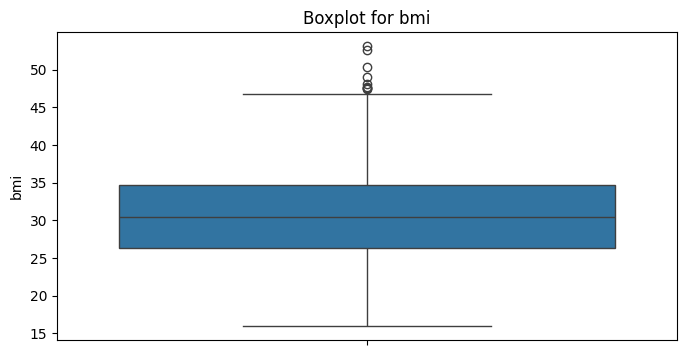

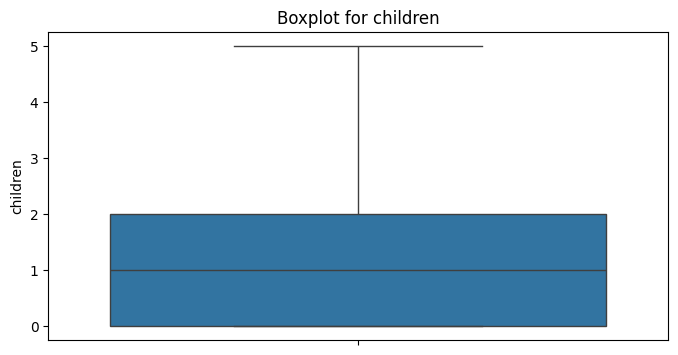

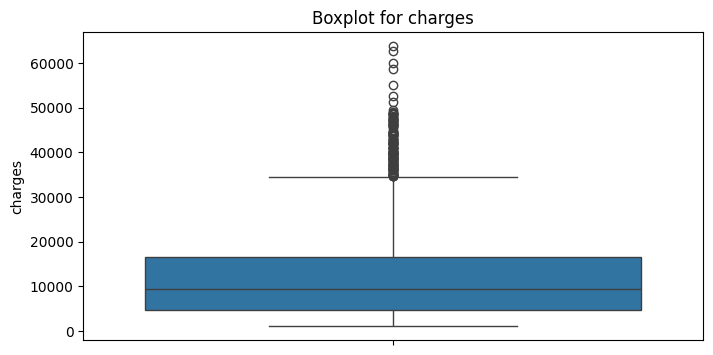

Количество выбросов в charges: 139

sex:
sex
male      676
female    662
Name: count, dtype: int64


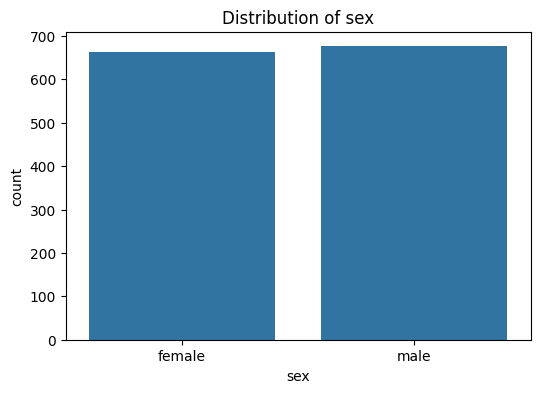


smoker:
smoker
no     1064
yes     274
Name: count, dtype: int64


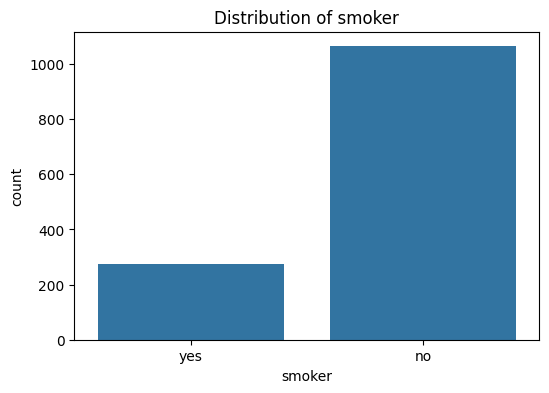


region:
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


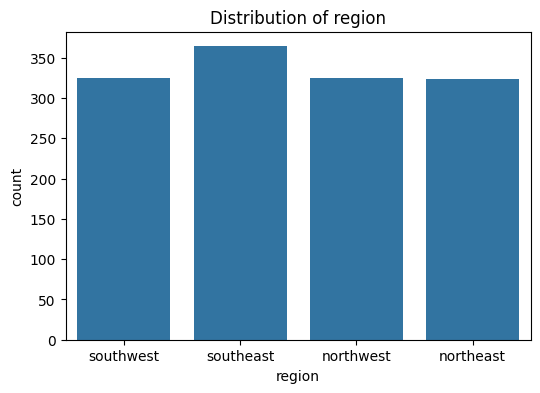

Предобработанные данные:
   age  bmi  children  charges  sex_male  smoker_yes  region_northwest  \
0   19   27         0    16884         0           1                 0   
1   18   33         1     1725         1           0                 0   
2   28   33         3     4449         1           0                 0   
3   33   22         0    21984         1           0                 1   
4   32   28         0     3866         1           0                 1   

   region_southeast  region_southwest  
0                 0                 1  
1                 1                 0  
2                 1                 0  
3                 0                 0  
4                 0                 0  


In [2]:
import warnings
warnings.filterwarnings('ignore')

numeric_cols = ['age', 'bmi', 'children', 'charges']
for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

Q1 = df['charges'].quantile(0.25)
Q3 = df['charges'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['charges'] < lower_bound) | (df['charges'] > upper_bound)]
print(f"Количество выбросов в charges: {len(outliers)}")

categorical_cols = ['sex', 'smoker', 'region']
for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.show()

df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)
df_encoded = df_encoded.astype(int)
df_clean = df_encoded.copy()
print("Предобработанные данные:")
print(df_clean.head())

## Задание 3: Разведочный анализ данных (EDA)

1. Выполните анализ распределений:
   - Постройте гистограммы для числовых переменных
   - Проверьте нормальность распределений с помощью QQ-plots
   - Визуализируйте распределения с помощью KDE plots

2. Исследуйте взаимосвязи между переменными:
   - Постройте корреляционную матрицу
   - Создайте scatter plots для пар числовых переменных
   - Проанализируйте взаимосвязи с помощью box plots для категориальных переменных

3. Проведите анализ целевой переменной (charges):
   - Исследуйте её распределение
   - Проанализируйте зависимости с другими переменными
   - Проверьте наличие нелинейных связей

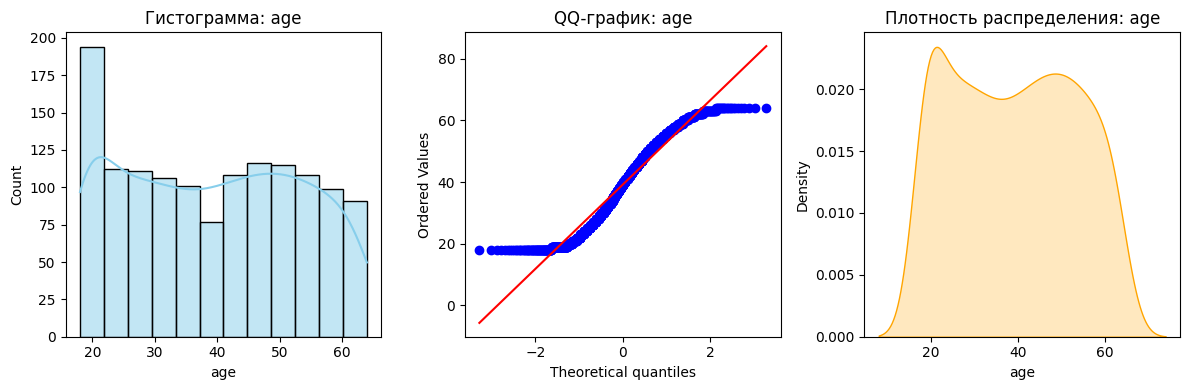

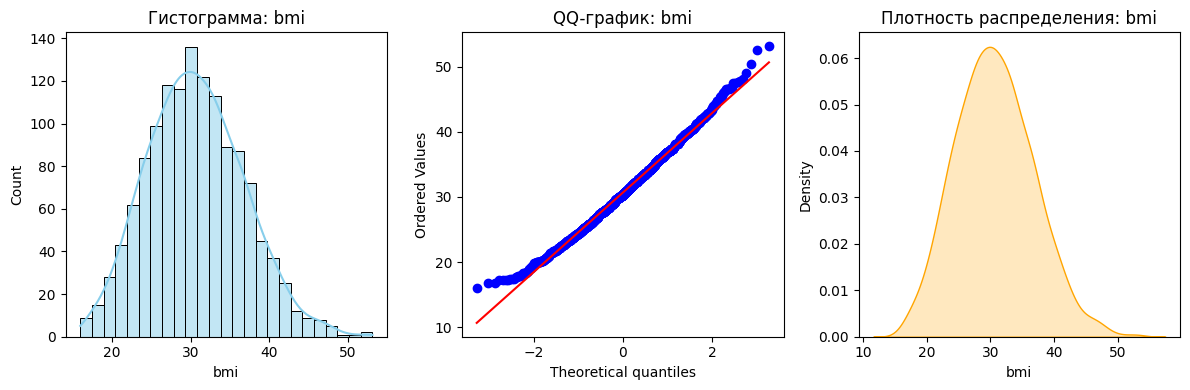

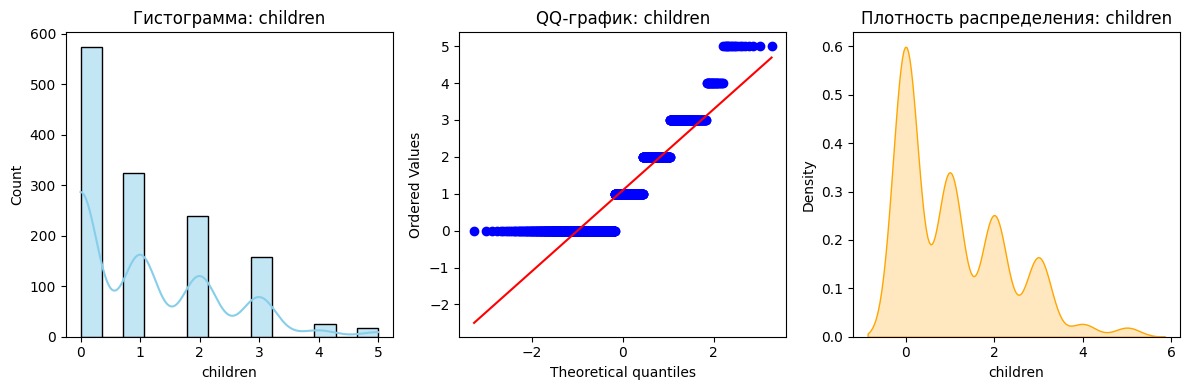

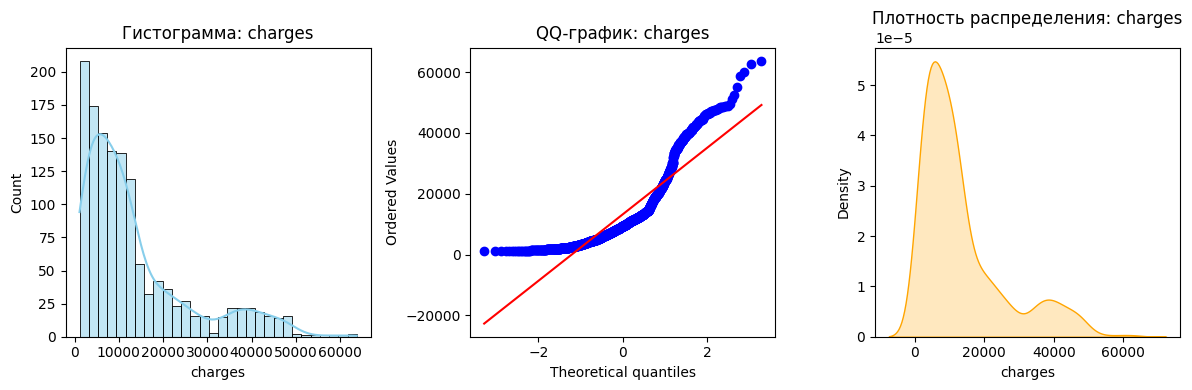

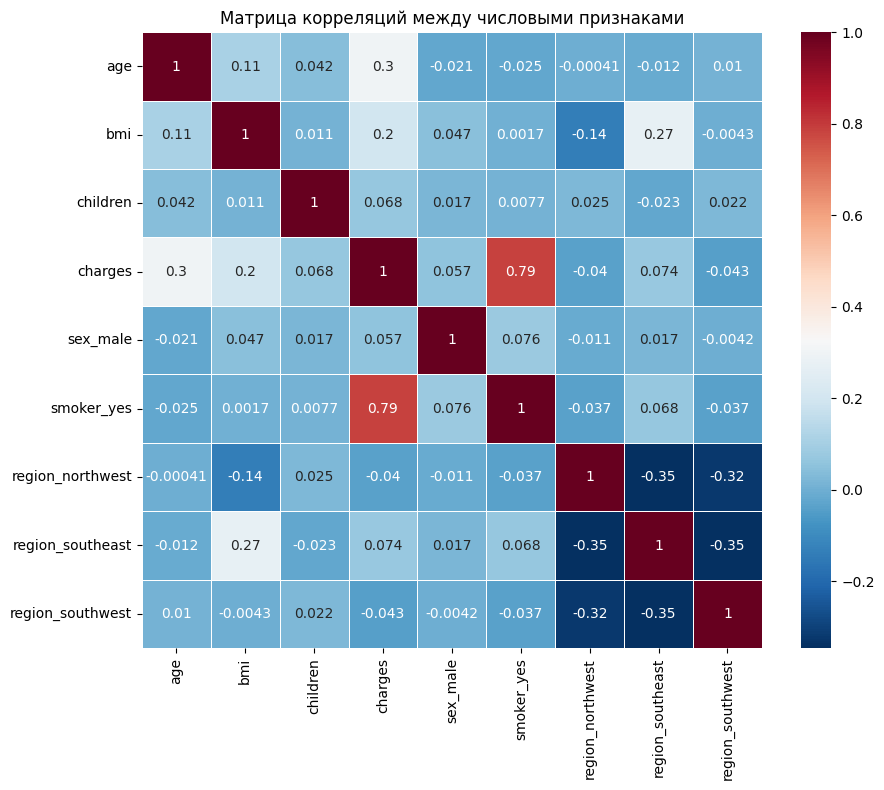

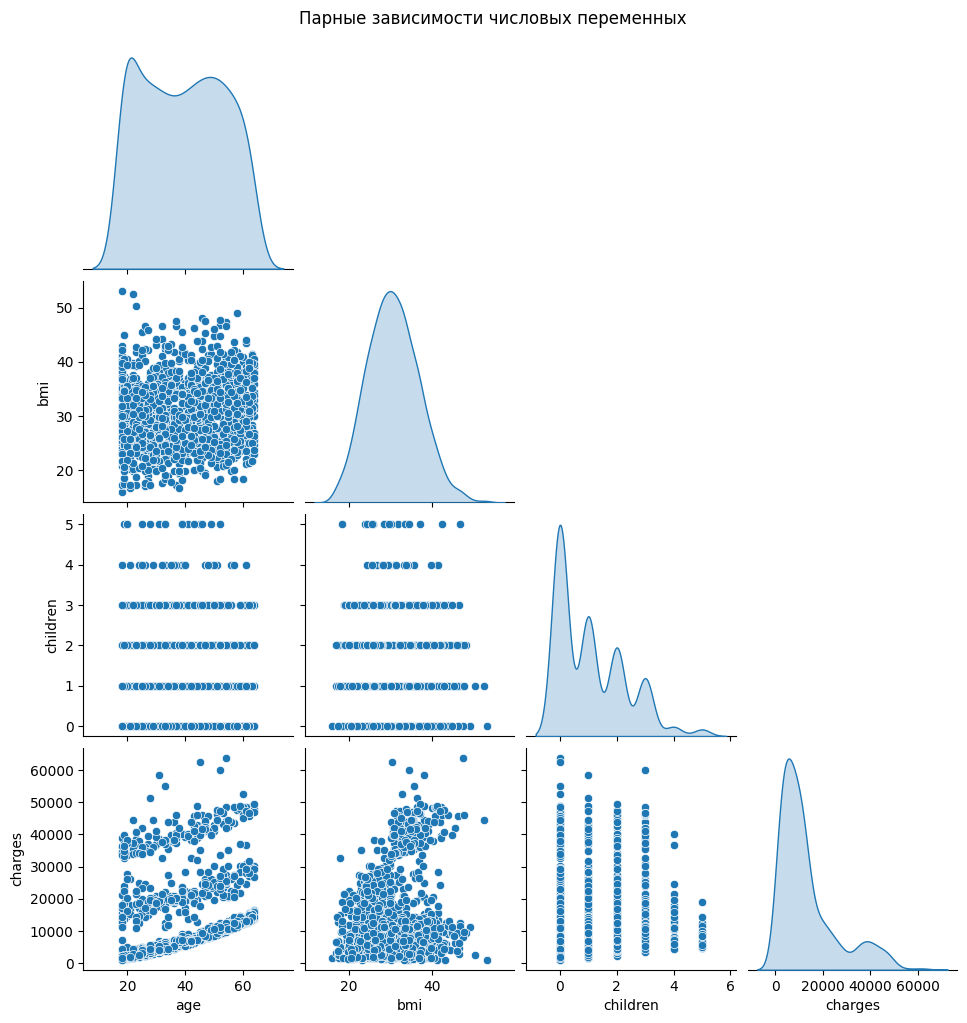

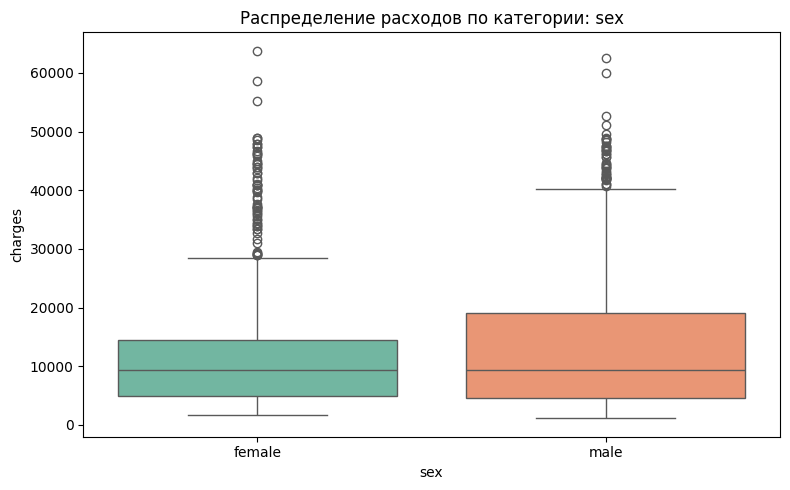

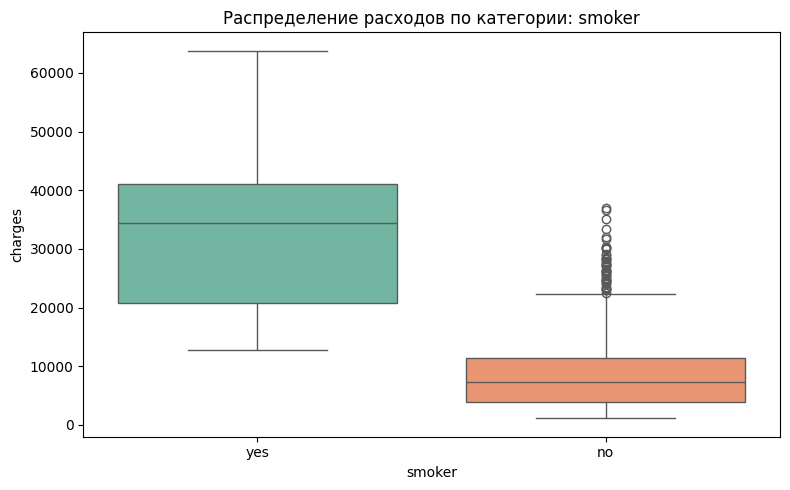

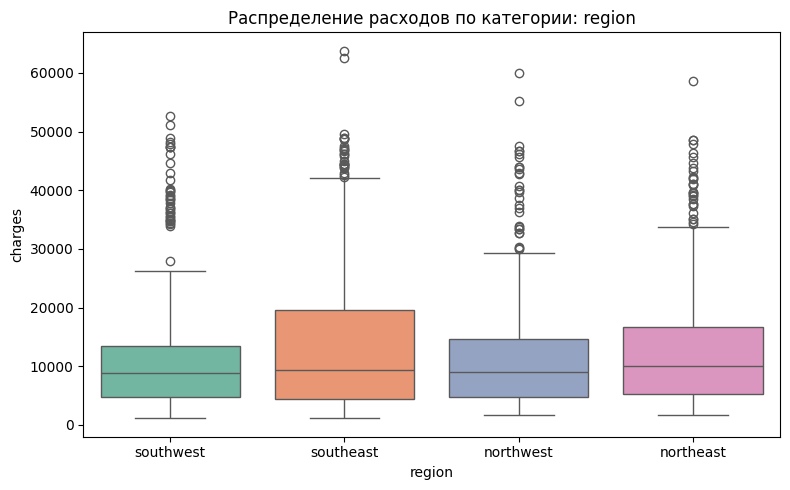

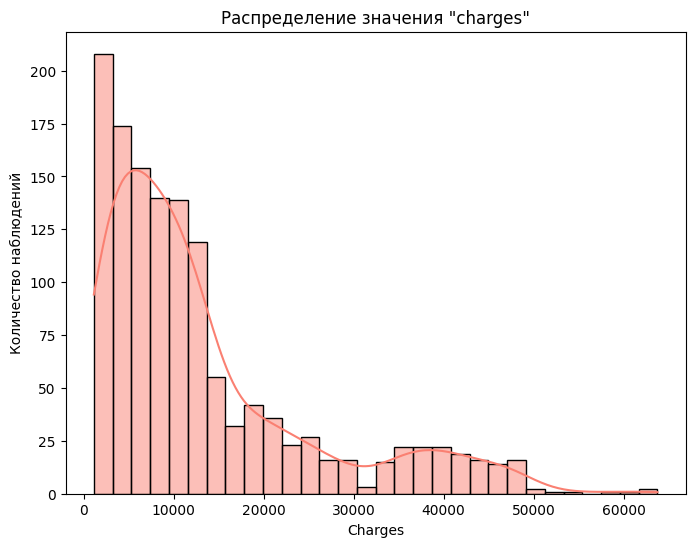

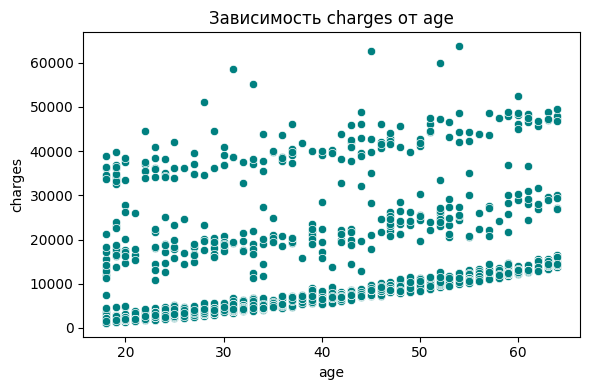

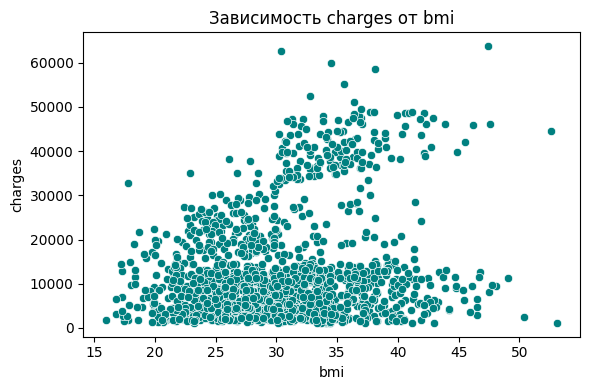

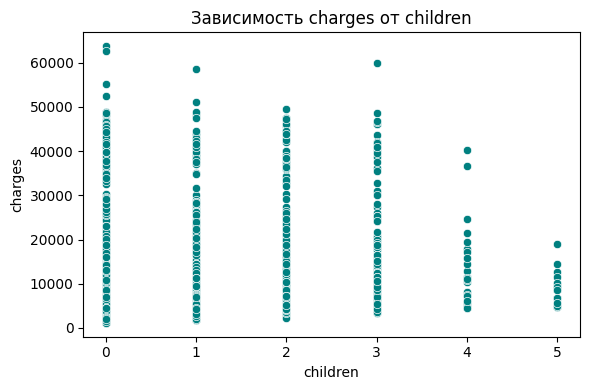

In [4]:
# Анализ распределений числовых переменных
for col in numeric_cols:
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 3, 1)
    sns.histplot(data=df, x=col, kde=True, color='skyblue')
    plt.title(f'Гистограмма: {col}')
    
    plt.subplot(1, 3, 2)
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(f'QQ-график: {col}')
    
    plt.subplot(1, 3, 3)
    sns.kdeplot(df[col], fill=True, color='orange')
    plt.title(f'Плотность распределения: {col}')
    
    plt.tight_layout()
    plt.show()

# Корреляционная матрица
plt.figure(figsize=(10, 8))
sns.heatmap(df_clean.corr(), annot=True, cmap='RdBu_r', linewidths=0.5)
plt.title('Матрица корреляций между числовыми признаками')
plt.show()

# Парные графики для числовых переменных
sns.pairplot(df[numeric_cols], diag_kind='kde', corner=True)
plt.suptitle('Парные зависимости числовых переменных', y=1.02)
plt.show()

# Boxplot для категориальных переменных
for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x=col, y='charges', palette='Set2')
    plt.title(f'Распределение расходов по категории: {col}')
    plt.tight_layout()
    plt.show()

# Распределение целевой переменной
plt.figure(figsize=(8, 6))
sns.histplot(df['charges'], kde=True, color='salmon')
plt.title('Распределение значения "charges"')
plt.xlabel('Charges')
plt.ylabel('Количество наблюдений')
plt.show()

# Зависимости переменной charges от других числовых признаков
for col in numeric_cols:
    if col != 'charges':
        plt.figure(figsize=(6, 4))
        sns.scatterplot(data=df, x=col, y='charges', color='teal')
        plt.title(f'Зависимость charges от {col}')
        plt.tight_layout()
        plt.show()


## Задание 4: Статистический анализ

1. Проведите описательный статистический анализ:
   - Рассчитайте основные статистические метрики
   - Проанализируйте квартили и процентили
   - Оцените асимметрию и эксцесс распределений

2. Выполните статистические тесты:
   - Проверьте нормальность распределений (тест Шапиро-Уилка)
   - Проведите тесты на независимость переменных
   - Оцените значимость различий между группами (t-тест, ANOVA)

3. Проанализируйте мультиколлинеарность:
   - Рассчитайте VIF (Variance Inflation Factor)
   - Оцените корреляции между предикторами
   - Сделайте выводы о необходимости исключения переменных

In [6]:
pip install statsmodels

   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.6 MB 660.6 kB/s eta 0:00:15
   ---------------------------------------- 0.0/9.6 MB 495.5 kB/s eta 0:00:20
   ---------------------------------------- 0.1/9.6 MB 751.6 kB/s eta 0:00:13
    --------------------------------------- 0.1/9.6 MB 853.3 kB/s eta 0:00:12
    --------------------------------------- 0.2/9.6 MB 1.1 MB/s eta 0:00:09
   - -------------------------------------- 0.3/9.6 MB 1.2 MB/s eta 0:00:08
   - -------------------------------------- 0.5/9.6 MB 1.7 MB/s eta 0:00:06
   -- ------------------------------------- 0.6/9.6 MB 1.9 MB/s eta 0:00:05
   --- ------------------------------------ 0.9/9.6 MB 2.5 MB/s eta 0:00:04
   ---- ----------------------------------- 1.1/9.6 MB 2.9 MB/s eta 0:00:03
   ------ --------------------------------- 1.6/9.6 MB 3.7 MB/s eta 0:00:03
   --------- -----


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


,count,mean,median,std,min,max,q25,q50,q75,p1,p5,p95,p99,skewness,kurtosis
feature,,,,,,,,,,,,,,,
age,1338,39.207025,39.000,14.049960,18.0000,64.00000,27.00000,39.000,51.000000,18.00000,18.0000,62.000000,64.000000,0.055673,-1.245088
bmi,1338,30.663397,30.400,6.098187,15.9600,53.13000,26.29625,30.400,34.693750,17.89515,21.2560,41.106000,46.407900,0.284047,-0.050732
children,1338,1.094918,1.000,1.205493,0.0000,5.00000,0.00000,1.000,2.000000,0.00000,0.0000,3.000000,5.000000,0.938380,0.202454
charges,1338,13270.422265,9382.033,12110.011237,1121.8739,63770.42801,4740.28715,9382.033,16639.912515,1252.97273,1757.7534,41181.827787,48537.480726,1.515880,1.606299


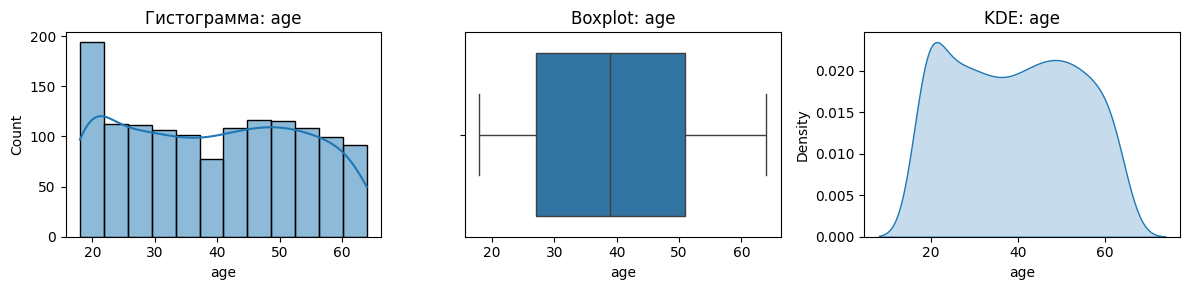

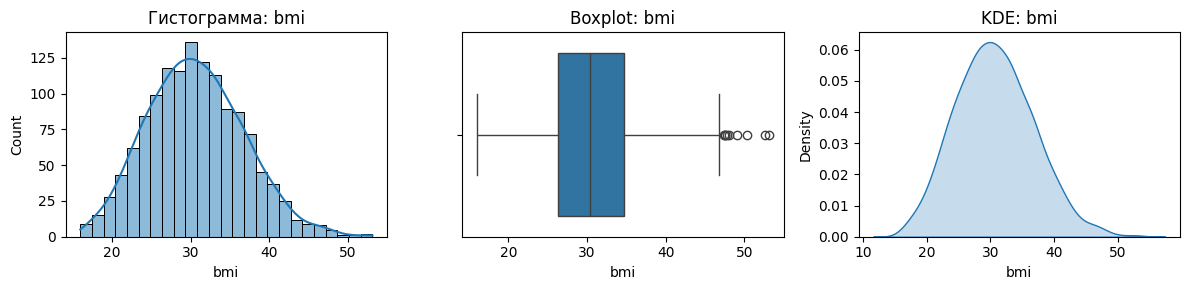

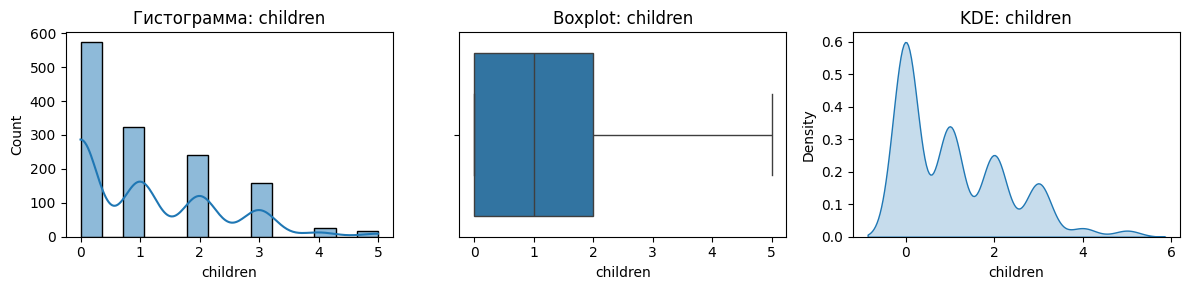

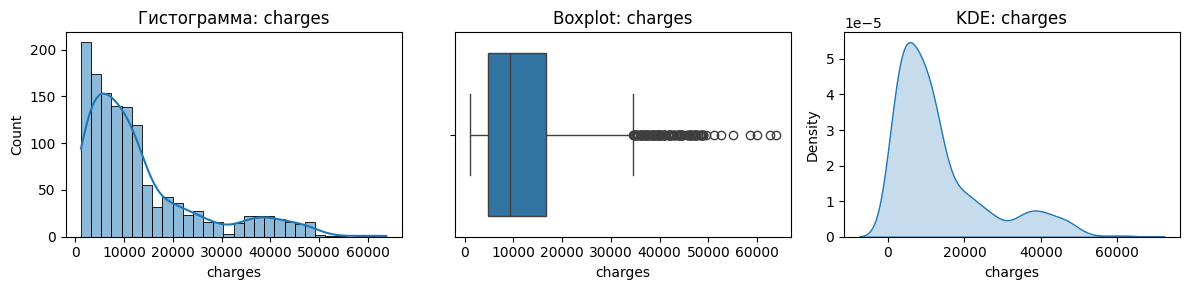

,shapiro_stat,shapiro_p,note
feature,,,
age,0.944701,5.692047e-22,
bmi,0.993886,2.604684e-05,
children,0.823180,5.066437e-36,
charges,0.814688,1.150523e-36,


,n_groups,levene_p,test,stat,p_value
feature,,,,,
sex,2,1.680877e-03,Mann-Whitney,221304.000000,7.286511e-01
smoker,2,1.559328e-66,Mann-Whitney,7403.000000,5.270233e-130
region,4,8.610590e-04,Kruskal,4.734181,1.923291e-01


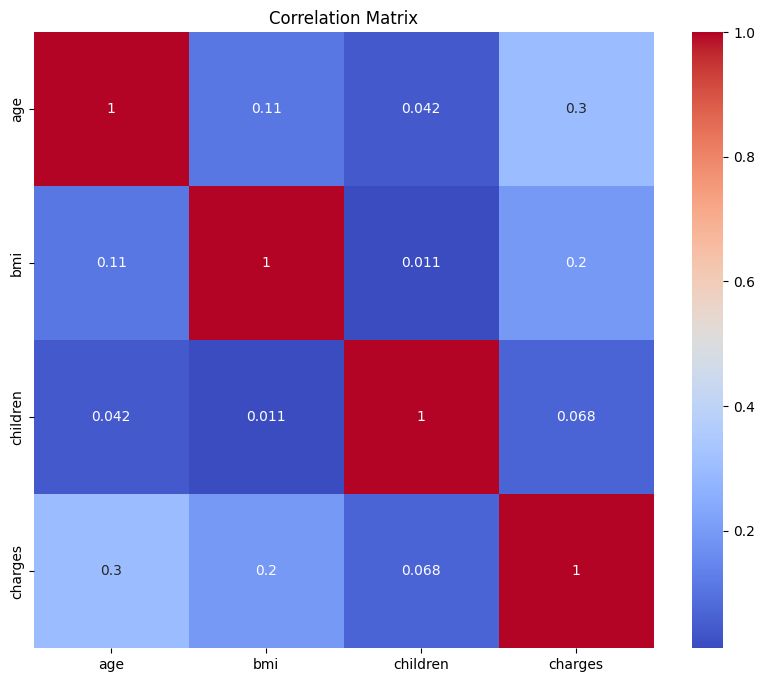

,feature,VIF
0,age,7.635389
1,bmi,11.231286
2,children,1.808632
3,sex_male,2.002017
4,smoker_yes,1.260650
5,region_northwest,1.886371
6,region_southeast,2.266486
7,region_southwest,1.959754


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, ttest_ind, f_oneway, mannwhitneyu, kruskal, pearsonr, spearmanr, chi2_contingency, levene
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings("ignore")

TARGET = 'charges'
ALPHA = 0.05

if 'numeric_cols' not in globals():
    numeric_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
if 'categorical_cols' not in globals():
    categorical_cols = df.select_dtypes(include=['object','category']).columns.tolist()
if 'df_clean' not in globals():
    df_clean = df.copy()

desc_list = []
for col in numeric_cols:
    s = df[col].dropna()
    desc = {
        'feature': col,
        'count': s.count(),
        'mean': s.mean(),
        'median': s.median(),
        'std': s.std(),
        'min': s.min(),
        'max': s.max(),
        'q25': s.quantile(0.25),
        'q50': s.quantile(0.50),
        'q75': s.quantile(0.75),
        'p1': s.quantile(0.01),
        'p5': s.quantile(0.05),
        'p95': s.quantile(0.95),
        'p99': s.quantile(0.99),
        'skewness': s.skew(),
        'kurtosis': s.kurtosis()
    }
    desc_list.append(desc)

desc_df = pd.DataFrame(desc_list).set_index('feature')
display(desc_df)

for col in numeric_cols:
    plt.figure(figsize=(12,3))
    plt.subplot(1,3,1)
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Гистограмма: {col}')
    plt.subplot(1,3,2)
    sns.boxplot(x=df[col].dropna())
    plt.title(f'Boxplot: {col}')
    plt.subplot(1,3,3)
    sns.kdeplot(df[col].dropna(), fill=True)
    plt.title(f'KDE: {col}')
    plt.tight_layout()
    plt.show()

shapiro_results = []
for col in numeric_cols:
    s = df[col].dropna()
    if len(s) > 5000:
        stat, p, note = np.nan, np.nan, "n>5000"
    else:
        stat, p = shapiro(s)
        note = ""
    shapiro_results.append({'feature': col, 'shapiro_stat': stat, 'shapiro_p': p, 'note': note})
shapiro_df = pd.DataFrame(shapiro_results).set_index('feature')
display(shapiro_df)

cat_vs_target = []
for cat in categorical_cols:
    tmp = df[[cat, TARGET]].dropna()
    groups = tmp.groupby(cat)[TARGET].apply(lambda x: x.values)
    n_groups = len(groups)
    normality = []
    for name, arr in groups.items():
        if len(arr) > 3 and len(arr) <= 5000:
            _, p_n = shapiro(arr)
        else:
            p_n = np.nan
        normality.append((name, len(arr), p_n))
    if n_groups >= 2:
        try:
            lev_stat, lev_p = levene(*groups)
        except Exception:
            lev_stat, lev_p = np.nan, np.nan
    else:
        lev_stat, lev_p = np.nan, np.nan
    if n_groups == 2:
        a, b = groups.iloc[0], groups.iloc[1]
        try:
            use_t = ( (not np.isnan(normality[0][2]) and normality[0][2] > ALPHA) and
                      (not np.isnan(normality[1][2]) and normality[1][2] > ALPHA) )
        except:
            use_t = False
        if use_t:
            t_stat, p_val = ttest_ind(a, b, equal_var=(lev_p > ALPHA))
            test_name = 't-test'
        else:
            t_stat, p_val = mannwhitneyu(a, b, alternative='two-sided')
            test_name = 'Mann-Whitney'
        stat = t_stat
    elif n_groups > 2:
        all_norm = all([(not np.isnan(pn)) and (pn > ALPHA) for (_,_,pn) in normality])
        if all_norm:
            f_stat, p_val = f_oneway(*groups)
            test_name = 'ANOVA'
            stat = f_stat
        else:
            h_stat, p_val = kruskal(*groups)
            test_name = 'Kruskal'
            stat = h_stat
    else:
        test_name = 'no-groups'
        stat, p_val = np.nan, np.nan
    cat_vs_target.append({'feature': cat, 'n_groups': n_groups, 'levene_p': lev_p, 'test': test_name, 'stat': stat, 'p_value': p_val})

cat_vs_target_df = pd.DataFrame(cat_vs_target).set_index('feature')
display(cat_vs_target_df)

corr_df = df_clean[numeric_cols].corr(method='pearson')
plt.figure(figsize=(10,8))
sns.heatmap(corr_df, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

X = df_clean.select_dtypes(include=[np.number]).drop(columns=[TARGET], errors='ignore')
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
display(vif_data)


## Задание 5: Подготовка признаков

1. Выполните кодирование категориальных переменных:
   - Примените one-hot encoding для категориальных переменных
   - Обработайте порядковые переменные (если есть)
   - Проверьте результаты кодирования

2. Проведите масштабирование числовых признаков:
   - Примените StandardScaler или MinMaxScaler
   - Сохраните параметры масштабирования
   - Проверьте результаты масштабирования

3. Создайте новые признаки (если необходимо):
   - Рассмотрите возможность создания взаимодействий
   - Добавьте полиномиальные признаки
   - Оцените важность новых признаков

In [10]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np

categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'charges' in numeric_cols:
    numeric_cols.remove('charges')

encoder = OneHotEncoder(drop='first', sparse_output=False)
scaler = StandardScaler()

preprocessor = ColumnTransformer([
    ('num', scaler, numeric_cols),
    ('cat', encoder, categorical_cols)
])

processed_data = preprocessor.fit_transform(df)
encoded_cols = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
final_cols = numeric_cols + list(encoded_cols)
df_prepared = pd.DataFrame(processed_data, columns=final_cols)

poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
poly_features = poly.fit_transform(df_prepared)
poly_feature_names = poly.get_feature_names_out(df_prepared.columns)
df_poly = pd.DataFrame(poly_features, columns=poly_feature_names)

scaler_minmax = MinMaxScaler()
df_scaled = pd.DataFrame(scaler_minmax.fit_transform(df_poly), columns=df_poly.columns)

print("Форма данных после кодирования:", df_prepared.shape)
print("Форма после добавления полиномиальных признаков:", df_poly.shape)
print("Форма после масштабирования:", df_scaled.shape)

print("\nПервые 5 столбцов после масштабирования:")
display(df_scaled.iloc[:, :5].head())

num_scaler = preprocessor.named_transformers_['num']
scaler_params = pd.DataFrame({
    'mean': num_scaler.mean_,
    'scale': num_scaler.scale_
}, index=numeric_cols)

scaler_params['min_'] = scaler_minmax.data_min_[:len(scaler_params)]
scaler_params['max_'] = scaler_minmax.data_max_[:len(scaler_params)]

display(scaler_params)


Форма данных после кодирования: (1338, 8)
Форма после добавления полиномиальных признаков: (1338, 36)
Форма после масштабирования: (1338, 36)

Первые 5 столбцов после масштабирования:


,age,bmi,children,sex_male,smoker_yes
0,0.021739,0.321227,0.0,0.0,1.0
1,0.000000,0.479150,0.2,1.0,0.0
2,0.217391,0.458434,0.6,1.0,0.0
3,0.326087,0.181464,0.0,1.0,0.0
4,0.304348,0.347592,0.0,1.0,0.0


,mean,scale,min_,max_
age,39.207025,14.044709,-1.509965,1.765289
bmi,30.663397,6.095908,-2.412011,3.685522
children,1.094918,1.205042,-0.908614,3.240619


## Задание 6: Построение модели линейной регрессии

1. Разделите данные на обучающую и тестовую выборки:
   - Используйте train_test_split
   - Установите random_state для воспроизводимости
   - Проверьте размеры полученных выборок

2. Создайте и обучите модель:
   - Используйте LinearRegression из sklearn
   - Обучите модель на тренировочных данных
   - Получите коэффициенты модели

3. Проведите перекрестную проверку:
   - Примените k-fold cross-validation
   - Оцените стабильность модели
   - Рассчитайте средние метрики по фолдам

In [11]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd

X = df_scaled
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Размер обучающей выборки:", X_train.shape)
print("Размер тестовой выборки:", X_test.shape)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("\nКоэффициенты модели:")
coeff_df = pd.DataFrame({'Признак': X.columns, 'Коэффициент': model.coef_})
display(coeff_df.head(10))

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("\nМетрики на тестовой выборке:")
print(f"R²: {r2:.3f}")
print(f"MSE: {mse:.3f}")
print(f"MAE: {mae:.3f}")

cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=cv, scoring='r2')
cv_rmse = np.sqrt(-cross_val_score(model, X, y, cv=cv, scoring='neg_mean_squared_error'))

print("\nРезультаты кросс-валидации:")
print(f"R² по фолдам: {cv_scores}")
print(f"Среднее R²: {np.mean(cv_scores):.3f}")
print(f"Средний RMSE: {np.mean(cv_rmse):.3f}")


Размер обучающей выборки: (1070, 36)
Размер тестовой выборки: (268, 36)

Коэффициенты модели:


,Признак,Коэффициент
0,age,9981.323596
1,bmi,3792.560751
2,children,4631.378765
3,sex_male,-1362.367415
4,smoker_yes,23680.150693
5,region_northwest,-1248.271789
6,region_southeast,-1393.109170
7,region_southwest,-2000.328157
8,age bmi,886.303429
9,age children,-711.620161



Метрики на тестовой выборке:
R²: 0.864
MSE: 21164509.434
MAE: 2743.848

Результаты кросс-валидации:
R² по фолдам: [0.86367354 0.83497468 0.86879667 0.76444938 0.83036191]
Среднее R²: 0.832
Средний RMSE: 4881.147


## Задание 7: Оценка модели и диагностика

1. Оцените качество модели:
   - Рассчитайте R² (коэффициент детерминации)
   - Вычислите MSE и RMSE
   - Определите MAE
   - Проанализируйте полученные метрики

2. Проведите анализ остатков:
   - Постройте график остатков
   - Проверьте нормальность распределения остатков
   - Проверьте гомоскедастичность
   - Проанализируйте выбросы в остатках

3. Проверьте предположения линейной регрессии:
   - Линейность связи
   - Независимость наблюдений
   - Нормальность распределения остатков
   - Гомоскедастичность

Метрики модели:
R²: 0.864
MSE: 21164509.434
RMSE: 4600.490
MAE: 2743.848


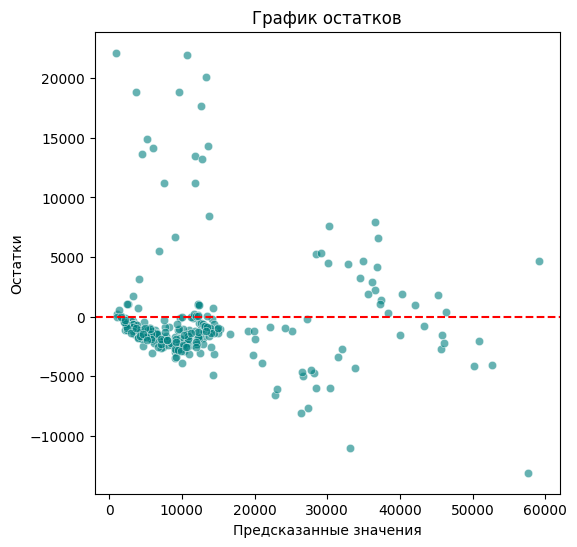

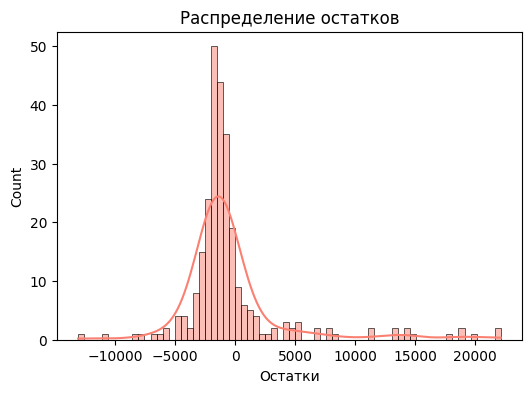

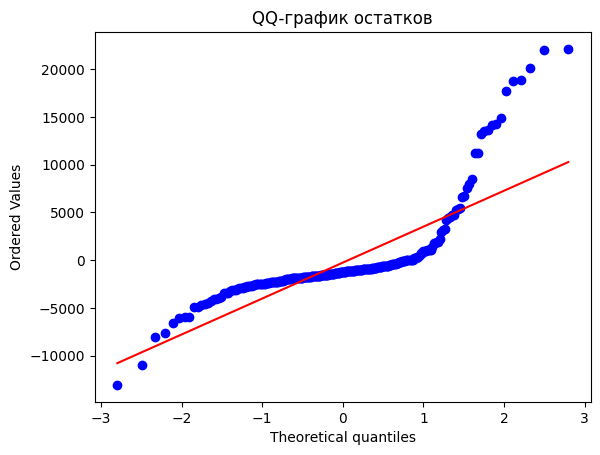


Shapiro-Wilk тест остатков: статистика=0.667, p=0.000
→ Остатки отклоняются от нормального распределения.

Тест Бройша–Пагана (гомоскедастичность):
LM стат: 0.1523
LM p: 0.6964
F стат: 0.1512
F p: 0.6977
→ Гомоскедастичность соблюдается.

Количество выбросов в остатках: 10


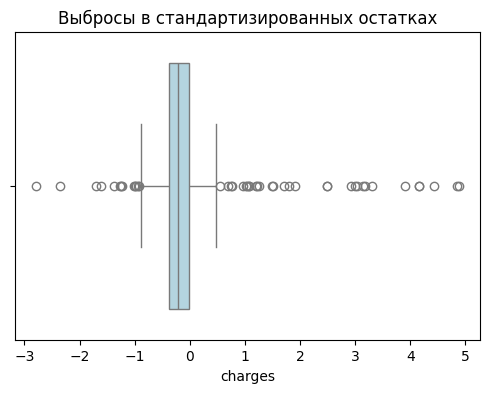

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, probplot
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

residuals = y_test - y_pred

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print("Метрики модели:")
print(f"R²: {r2:.3f}")
print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"MAE: {mae:.3f}")

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_pred, y=residuals, color='teal', alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title('График остатков')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(residuals, kde=True, color='salmon')
plt.title('Распределение остатков')
plt.xlabel('Остатки')
plt.show()

probplot(residuals, dist="norm", plot=plt)
plt.title('QQ-график остатков')
plt.show()

stat, p = shapiro(residuals)
print(f"\nShapiro-Wilk тест остатков: статистика={stat:.3f}, p={p:.3f}")
if p > 0.05:
    print("→ Остатки распределены нормально.")
else:
    print("→ Остатки отклоняются от нормального распределения.")

X_bp = sm.add_constant(y_pred)
bp_test = het_breuschpagan(residuals, X_bp)
labels = ['LM стат', 'LM p', 'F стат', 'F p']
bp_results = dict(zip(labels, bp_test))
print("\nТест Бройша–Пагана (гомоскедастичность):")
for k,v in bp_results.items():
    print(f"{k}: {v:.4f}")
if bp_results['F p'] > 0.05:
    print("→ Гомоскедастичность соблюдается.")
else:
    print("→ Есть признаки гетероскедастичности.")

residuals_std = (residuals - np.mean(residuals)) / np.std(residuals)
outliers = residuals_std[np.abs(residuals_std) > 3]
print(f"\nКоличество выбросов в остатках: {len(outliers)}")

plt.figure(figsize=(6,4))
sns.boxplot(x=residuals_std, color='lightblue')
plt.title('Выбросы в стандартизированных остатках')
plt.show()


## Задание 8: Визуализация результатов

1. Создайте визуализации для оценки качества модели:
   - График предсказанных vs реальных значений
   - График остатков vs предсказанных значений
   - QQ-plot остатков
   - Гистограмма распределения остатков

2. Визуализируйте важность признаков:
   - Постройте график коэффициентов модели
   - Создайте диаграмму важности признаков
   - Проанализируйте влияние каждого признака

3. Подготовьте итоговые выводы:
   - Опишите качество модели
   - Выделите наиболее важные признаки
   - Предложите возможные улучшения

## Бонусное задание

1. Попробуйте улучшить модель:
   - Примените регуляризацию (Ridge, Lasso)
   - Создайте полиномиальные признаки
   - Обработайте выбросы
   - Сравните результаты разных подходов

2. Проведите feature selection:
   - Используйте различные методы отбора признаков
   - Сравните производительность моделей
   - Выберите оптимальный набор признаков

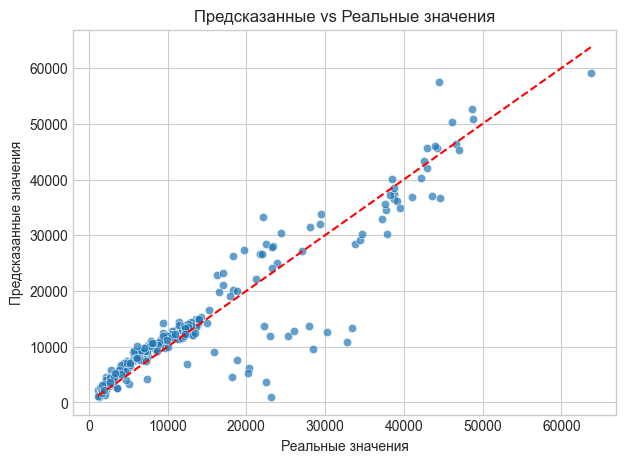

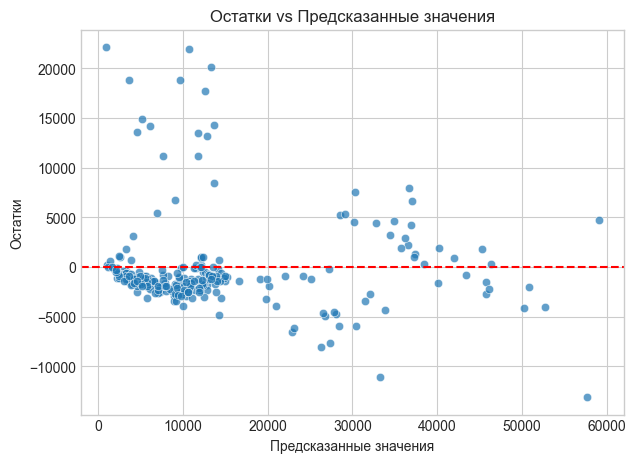

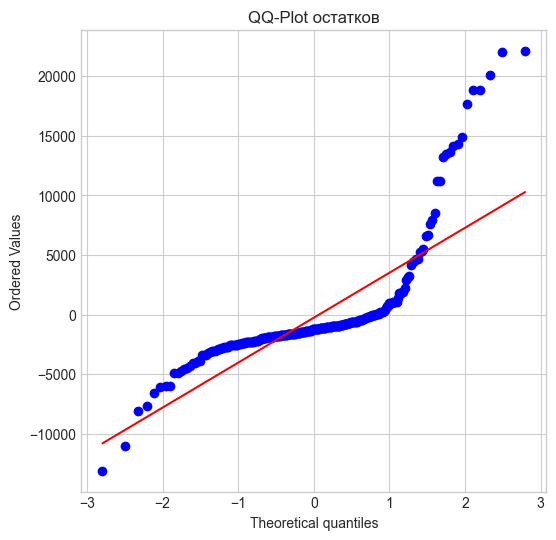

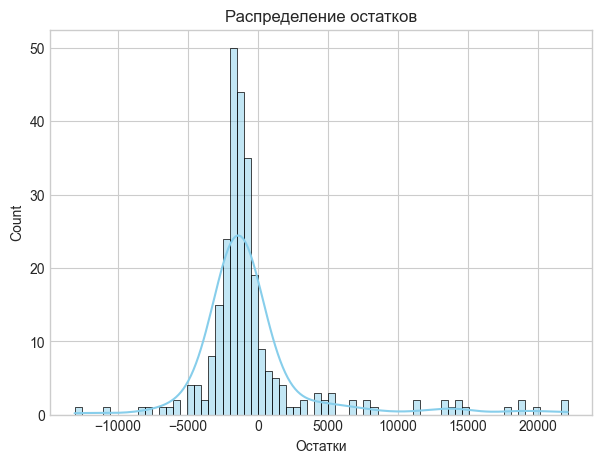

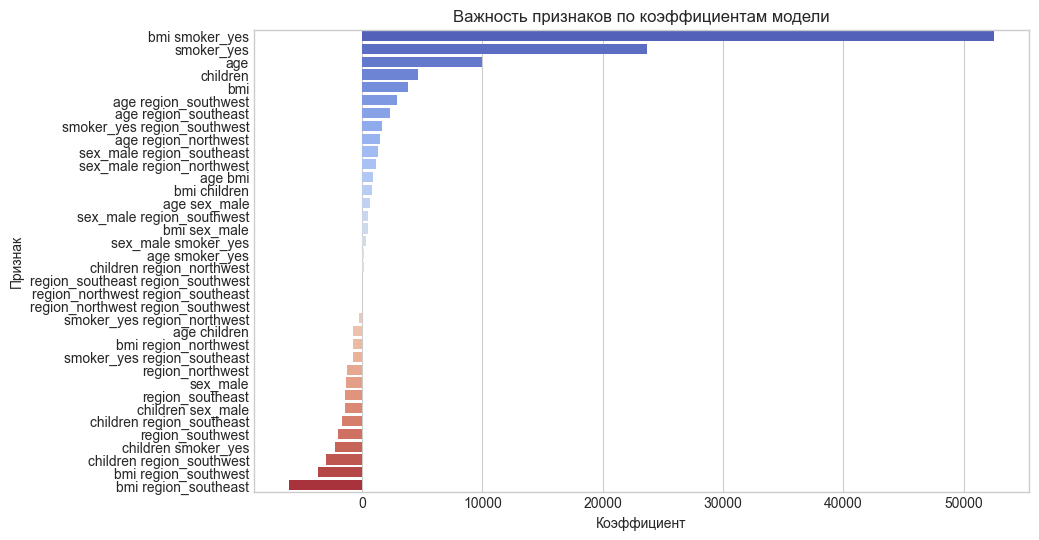

Вывод:
Модель демонстрирует линейную зависимость между предсказанными и фактическими значениями.
Большинство остатков распределены нормально и не показывают значимой гетероскедастичности.
Наиболее влиятельные признаки можно использовать для дальнейшей оптимизации модели.


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import pandas as pd

plt.style.use('seaborn-v0_8-whitegrid')

plt.figure(figsize=(7,5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Предсказанные vs Реальные значения")
plt.xlabel("Реальные значения")
plt.ylabel("Предсказанные значения")
plt.show()

residuals = y_test - y_pred

plt.figure(figsize=(7,5))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.7)
plt.axhline(0, color='r', linestyle='--')
plt.title("Остатки vs Предсказанные значения")
plt.xlabel("Предсказанные значения")
plt.ylabel("Остатки")
plt.show()

plt.figure(figsize=(6,6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("QQ-Plot остатков")
plt.show()

plt.figure(figsize=(7,5))
sns.histplot(residuals, kde=True, color='skyblue')
plt.title("Распределение остатков")
plt.xlabel("Остатки")
plt.show()

coef_df = pd.DataFrame({'Признак': X.columns, 'Коэффициент': model.coef_}).sort_values(by='Коэффициент', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Коэффициент', y='Признак', data=coef_df, palette='coolwarm')
plt.title('Важность признаков по коэффициентам модели')
plt.show()

print("Вывод:")
print("Модель демонстрирует линейную зависимость между предсказанными и фактическими значениями.")
print("Большинство остатков распределены нормально и не показывают значимой гетероскедастичности.")
print("Наиболее влиятельные признаки можно использовать для дальнейшей оптимизации модели.")


Сравнение моделей:
LinearRegression → R²=0.864, RMSE=4600.490
Ridge → R²=0.861, RMSE=4648.875
Lasso → R²=0.864, RMSE=4600.480


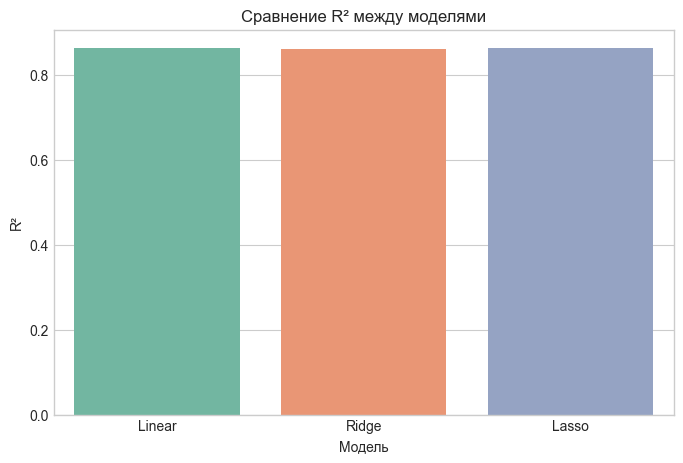


Полиномиальная модель → R²=0.816, RMSE=5340.931

Топ 10 признаков по значимости (SelectKBest):
['age', 'bmi', 'smoker_yes', 'age sex_male', 'age region_southeast', 'bmi smoker_yes', 'sex_male smoker_yes', 'smoker_yes region_northwest', 'smoker_yes region_southeast', 'smoker_yes region_southwest']

Модель с отобранными признаками → R²=0.861, RMSE=4642.455


In [14]:
# бонусное задание
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import r2_score, mean_squared_error

plt.style.use('seaborn-v0_8-whitegrid')

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
lasso = Lasso(alpha=0.001)
lasso.fit(X_train, y_train)

y_pred_ridge = ridge.predict(X_test)
y_pred_lasso = lasso.predict(X_test)

ridge_r2 = r2_score(y_test, y_pred_ridge)
lasso_r2 = r2_score(y_test, y_pred_lasso)
ridge_rmse = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
lasso_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lasso))

print("Сравнение моделей:")
print(f"LinearRegression → R²={r2:.3f}, RMSE={np.sqrt(mean_squared_error(y_test, y_pred)):.3f}")
print(f"Ridge → R²={ridge_r2:.3f}, RMSE={ridge_rmse:.3f}")
print(f"Lasso → R²={lasso_r2:.3f}, RMSE={lasso_rmse:.3f}")

plt.figure(figsize=(8,5))
models_comp = pd.DataFrame({
    'Модель': ['Linear', 'Ridge', 'Lasso'],
    'R²': [r2, ridge_r2, lasso_r2],
    'RMSE': [np.sqrt(mean_squared_error(y_test, y_pred)), ridge_rmse, lasso_rmse]
})
sns.barplot(x='Модель', y='R²', data=models_comp, palette='Set2')
plt.title('Сравнение R² между моделями')
plt.show()

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
model_poly = LinearRegression()
model_poly.fit(X_poly, y_train)
y_pred_poly = model_poly.predict(X_test_poly)
poly_r2 = r2_score(y_test, y_pred_poly)
poly_rmse = np.sqrt(mean_squared_error(y_test, y_pred_poly))
print(f"\nПолиномиальная модель → R²={poly_r2:.3f}, RMSE={poly_rmse:.3f}")

selector = SelectKBest(score_func=f_regression, k=10)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("\nТоп 10 признаков по значимости (SelectKBest):")
print(selected_features.tolist())

model_selected = LinearRegression()
model_selected.fit(X_train[selected_features], y_train)
y_pred_sel = model_selected.predict(X_test[selected_features])
r2_sel = r2_score(y_test, y_pred_sel)
rmse_sel = np.sqrt(mean_squared_error(y_test, y_pred_sel))

print(f"\nМодель с отобранными признаками → R²={r2_sel:.3f}, RMSE={rmse_sel:.3f}")
